In [24]:
import xarray as xr
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.data_wrangling as data
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings('ignore', category=xr.SerializationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

In [25]:
# # define path and in pull in file names
# file_path = '/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.1_pdSST-pdSIC'
# file_names = os.listdir(file_path)
# # split model name out of file names and remove two models not in 1.6
# model_names2 = [os.path.basename(f).split('_')[0] for f in file_names]
# model_names2 = [element for element in model_names2 if element not in ('E3SMv1', 'ECHAM6.3')]

# Check if lists are equal
# model_names == model_names2

file_path = '/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/'
file_names = os.listdir(file_path+'1.6_pdSST-futArcSIC')

# model_names2 = []
# for file in file_names:
#     model = os.path.basename(file).split('_')[0]
#     model_names2.append(model)

# shorter version of above:
model_names = [os.path.basename(f).split('_')[0] for f in file_names]
# model_names.remove('FGOALS-f3-L')
print(model_names)

['CESM1-WACCM-SC', 'IPSL-CM6A-LR', 'OpenIFS-159', 'OpenIFS-511']


In [26]:
# pull in model names
pd_models = [file_path+f'1.1_pdSST-pdSIC/{item}*.nc' for item in model_names]
# import all datasets into one list
pd_data = [xr.open_mfdataset(pd) for pd in pd_models]
# extract ubar for each model
pd_zonal_wind = [ds['ubar'] for ds in pd_data]

In [27]:
# if 'ens_ax' in pd_zonal_wind.dims
pd_zonal_wind_djf = []
for model in pd_zonal_wind:
    # subset data to consistency 
    model = model.sel(level=[1000.,  925.,  850.,  700.,  600.,  500.,  
                                400.,  300.,  250.,  200.,  150.,  100.,
                                70.,   50.,   30.,   20.,   10.,    1.])
    model = model.sel(lat=slice(0,90))
    if 'ens_ax' in model.dims:
        model = model.mean('ens_ax')
    # take winter mean
    model = data.seasonal_mean(model, season='djf')
    model = model.mean('time')
    
    pd_zonal_wind_djf.append(model)

In [28]:
# Stack the zonal means along a new dimension (e.g., 'model')
pd_stacked_zonal_means = xr.concat(pd_zonal_wind_djf, dim='model', coords='minimal')
# Calculate the multi-model mean
pd_multi_model_mean = pd_stacked_zonal_means.mean(dim='model')

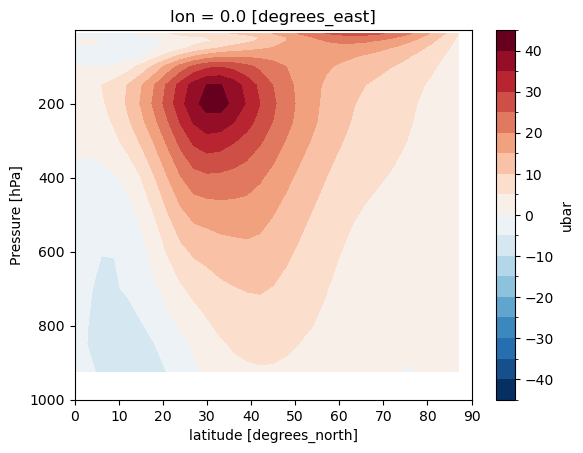

In [29]:
pd_multi_model_mean.plot.contourf(levels=20, yincrease=False)

In [30]:
# pd_multi_model_mean.to_netcdf('/home/users/cturrell/documents/eddy_feedback/plots/ubar_pdSST-pdSIC_model-mean.nc')

In [31]:
# pull in model names
futArc_models = [file_path+f'1.6_pdSST-futArcSIC/{item}*.nc' for item in model_names]
# import all datasets into one list
futArc_data = [xr.open_mfdataset(futArc) for futArc in futArc_models]
# extract ubar for each model
futArc_zonal_wind = [ds['ubar'] for ds in futArc_data]

In [32]:
# make data consistent and take winter mean
futArc_zonal_wind_djf = []
for model in futArc_zonal_wind:
    # subset data to consistency 
    model = model.sel(level=[1000.,  925.,  850.,  700.,  600.,  500.,  
                                400.,  300.,  250.,  200.,  150.,  100.,
                                70.,   50.,   30.,   20.,   10.,    1.])
    model = model.sel(lat=slice(0,90))
    if 'ens_ax' in model.dims:
        model = model.mean('ens_ax')
    # take winter mean
    model = data.seasonal_mean(model, season='djf')
    model = model.mean('time')
    
    futArc_zonal_wind_djf.append(model)

In [33]:
# Stack the zonal means along a new dimension (e.g., 'model')
futArc_stacked_zonal_means = xr.concat(futArc_zonal_wind_djf, dim='model', coords='minimal')
# Calculate the multi-model mean
futArc_multi_model_mean = futArc_stacked_zonal_means.mean(dim='model')

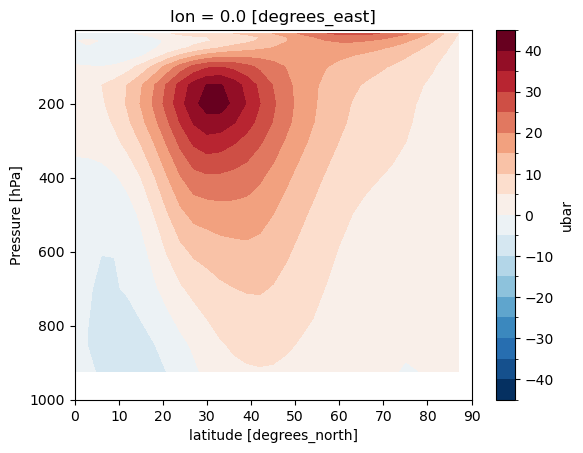

In [34]:
futArc_multi_model_mean.plot.contourf(levels=20, yincrease=False)

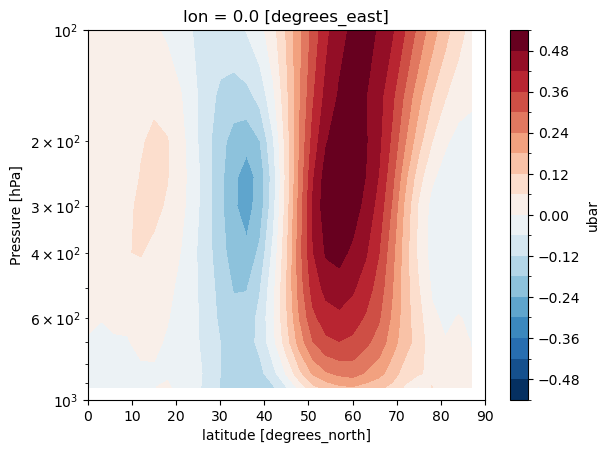

In [35]:
diff = pd_multi_model_mean - futArc_multi_model_mean
diff = diff.sel(level=slice(1000, 100))
diff.plot.contourf(levels=20, yincrease=False, yscale='log')

In [36]:
# diff.to_netcdf('/home/users/cturrell/documents/eddy_feedback/plots/ubar-diff_model-mean_pd-futArc.nc')